### Вариант 9

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
data = np.load('C:/python/inverse/18_11/data/data_v9.npy')

Считаем к-ты Фурье, разложить по синусам и косинусам

In [78]:
N = len(data)

N_appr = 15
cos_coeff = np.zeros(N_appr)
sin_coeff = np.zeros(N_appr)
for k in range(N_appr):
    cos_coeff[k] = np.sum(np.cos(data * k)) / N
    sin_coeff[k] = np.sum(np.sin(data * k)) / N
    
x_axis = np.linspace(-0.5, 0.5)
function = np.zeros_like(x_axis)
for k in range(1, N_appr):
    function += (cos_coeff[k] * np.cos(k * x_axis) + sin_coeff[k] * np.sin(k * x_axis)) / (1 * np.pi)
    
function += cos_coeff[0] * np.ones_like(x_axis) / (2 * np.pi)


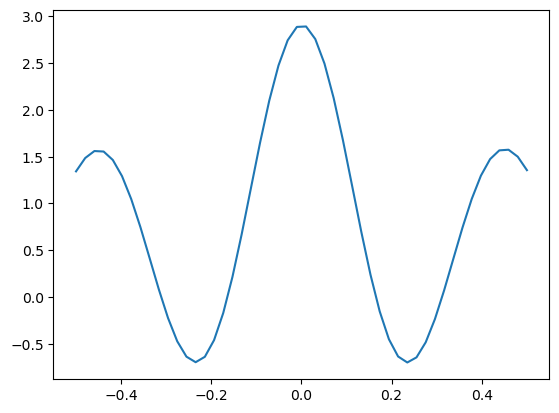

In [79]:
plt.plot(x_axis, function)

(array([2.46600717, 0.02900008, 0.        , 0.02950009, 2.42900706,
        2.50400728, 0.03750011, 0.        , 0.02600008, 2.47900721]),
 array([-5.00000000e-01, -4.00000291e-01, -3.00000582e-01, -2.00000872e-01,
        -1.00001163e-01, -1.45413344e-06,  9.99982550e-02,  1.99997964e-01,
         2.99997673e-01,  3.99997383e-01,  4.99997092e-01]),
 <BarContainer object of 10 artists>)

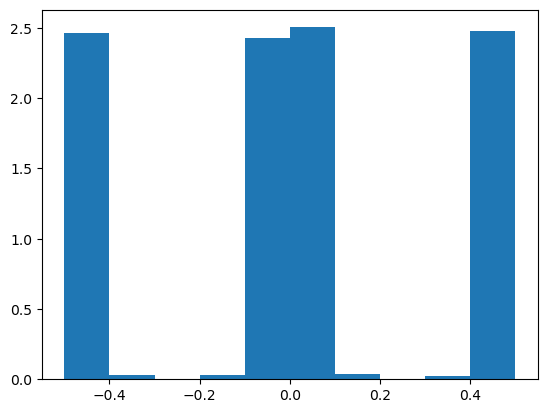

In [80]:
plt.hist(data, density=True)

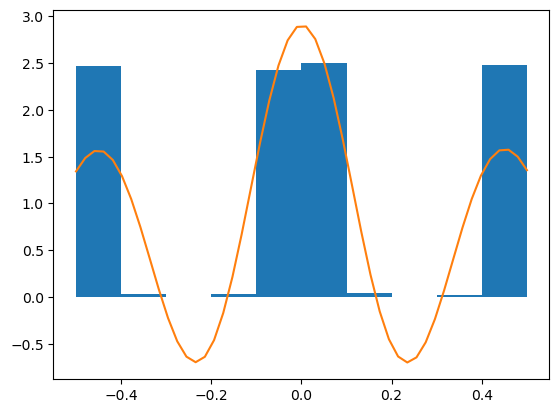

In [81]:
plt.hist(data, density=True)
plt.plot(x_axis, function)